## Question 2

The phenomenon our group is interested in exploring is patterns in international arms transfers, specifically modeling how weapons flow from one country to another. The sale, transfer, and flow of weapons represents more than just a one-off relationship between two countries looking to make a deal. These transactions often form part of a larger network of international trade, rooted in the politics, international relations, and global security of the world. These sales are often used as catalysts and projections of major geopolitical influence, and as a result, our group will look to use features in the data itself to explore topics like changes in political influence, such as the height of the Cold War, Middle East conflicts of the 2000s. These are important to analyze because states that have many transactions often affect critical geopolitical levers like shipping security, maritime access, and logistical lines. Interstate competition includes nations using arms transfers (sales, leases, assistance) as part of a broader influence strategy to obtain relative political advantage (basing rights, port access, UN voting alignment, etc). To best understand these impacts, our group decided to conduct some exploratory data analysis before building any non-parametric models.

First, our group found it important to investigate the data itself. We first identified which nations dominated the proportions of exports to determine which countries were responsible for the most arms transfers, as well as where those transfers went.

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
# do not include when copying back to the full jupyter notebook

data = pd.read_csv('trade-register.csv', encoding='latin-1', skiprows = 11)
data = data.drop(data.columns[[3, 5, 9]], axis = 1)
data = data.drop([24139, 26822], axis = 0)

In [33]:
data.head()

,Recipient,Supplier,Year of order,Number ordered,Weapon designation,Weapon description,Number delivered,Year(s) of delivery,status,Comments,SIPRI TIV per unit,SIPRI TIV for total order,SIPRI TIV of delivered weapons
0,Afghanistan,Turkiye,2007.0,24.0,M-114 155mm,towed gun,24.0,2007,Second hand,Second-hand; aid,0.20,4.80,4.80
1,Afghanistan,United States,2004.0,188.0,M-113,armoured personnel carrier,188.0,2005,Second hand,Second-hand; aid; M-113A2 version; incl 15 M-5...,0.10,18.80,18.80
2,Afghanistan,United States,2016.0,53.0,S-70 Black Hawk,transport helicopter,53.0,2017; 2018; 2019; 2020,Second hand but modernized,Second-hand UH-60A modernized to UH-60A+ befor...,4.29,227.37,227.37
3,Afghanistan,Soviet Union,1973.0,100.0,T-62,tank,100.0,1975; 1976,New,NaN,1.80,180.00,180.00
4,Afghanistan,Soviet Union,1978.0,500.0,T-55,tank,500.0,1979; 1980; 1981; 1982; 1983; 1984; 1985; 1986...,Second hand,Second-hand; aid,0.50,250.00,250.00


In [34]:
# data[data['Recipient'] == 'Afghanistan'].groupby('Year of order')['SIPRI TIV for total order'].sum().plot()
# plt.title('Arms Transfers to Afghanistan Over Time')

28348

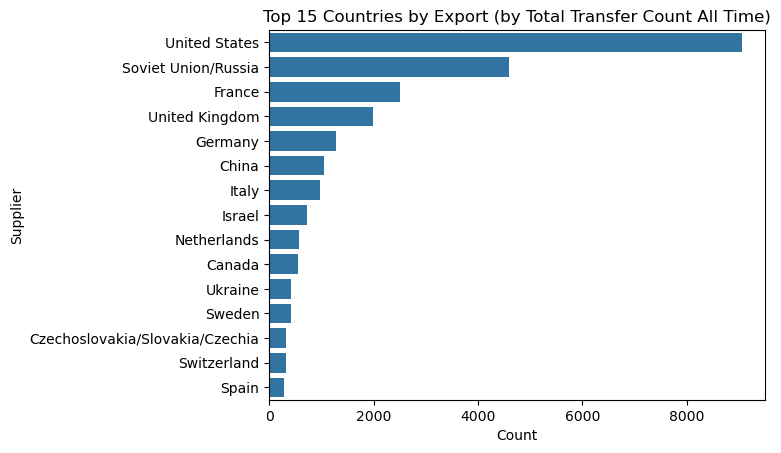

In [42]:
# Top Exporters 

data['Supplier'] = data['Supplier'].replace(['Soviet Union', 'Russia'], 'Soviet Union/Russia')

top_exporters = (data.loc[:, ['Supplier']]
             .value_counts()
             .reset_index(name = 'Count'))

exporttop15 = top_exporters.head(15)

sns.barplot(data = exporttop15, y = 'Supplier', x = 'Count', orient = 'h')
plt.title('Top 15 Countries by Export (by Total Transfer Count All Time)')

len(data)

In [36]:
len(data)

28348

Looking at the distribution of total arms exports by country, it is clear that countries like the United States, Soviet Union, and western European power dominates the faciliation of arms to other countries. The United States alone, comprises ~ 30% of all arms exports, while the Soviet Union, United Kingdom, and France all individually account for more than 5% themselves. But to understand the bigger picture, and derive the geopolitical context of these transfers, it is just as important to understand to analyze where these weapons went and when they did to see how the world has changed over the last 75 years.

Text(0.5, 1.0, 'Top 15 Countries by Imports (by Total Transfer Count All Time)')

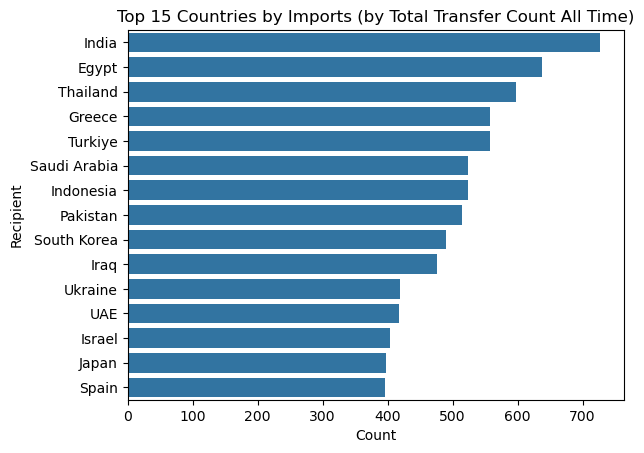

In [ ]:
top_importers = (data.loc[:, ['Recipient']]
             .value_counts()
             .reset_index(name = 'Count'))
importtop15 = top_importers.head(15)

sns.barplot(data = importtop15, y = 'Recipient', x = 'Count', orient = 'h')
plt.title('Top 15 Countries by Imports (by Total Transfer Count All Time)')

Looking at the countries that have received the most weapons transfers, several countries with known significant conflicts stand out immediately. Areas like Egypt in its conflifcts with the Arab-Israeli Wars, Iraq with the conflicts in the Middle East of the 2000s, and more recently, the Russian invasian of Ukraine highlight the geopolitical significance of these transfers. However, to understand where and why these transfers happened, it would be even more important to understand and connect where the countries with top importers sent their weapons to highlight any relevant geopolitical alliances, as well as when these conflicts happened in order to understand their historical significance. 

In [38]:
'''

NOT TO BE INCLUDED

# Export Destinations for Top 5 Exporters

import plotly.graph_objects as go

top5exports = top_exporters.head(5)['Supplier'].values

top5destinations = [] 

for exporter in top5exports:
    destination = (data[data['Supplier'] == exporter]
                   .groupby('Recipient')
                   .size()
                   .reset_index(name='Count')
                   .sort_values('Count', ascending=False)
                   .head(5))
    destination['Exporter'] = exporter
    top5destinations.append(destination)

top5df = pd.concat(top5destinations, ignore_index=True)
top5df = top5df[['Exporter', 'Recipient', 'Count']]
print(top5df.to_string(index=False))

# https://plotly.com/python/sankey-diagram/


'''

"\n\nNOT TO BE INCLUDED\n\n# Export Destinations for Top 5 Exporters\n\nimport plotly.graph_objects as go\n\ntop5exports = top_exporters.head(5)['Supplier'].values\n\ntop5destinations = [] \n\nfor exporter in top5exports:\n    destination = (data[data['Supplier'] == exporter]\n                   .groupby('Recipient')\n                   .size()\n                   .reset_index(name='Count')\n                   .sort_values('Count', ascending=False)\n                   .head(5))\n    destination['Exporter'] = exporter\n    top5destinations.append(destination)\n\ntop5df = pd.concat(top5destinations, ignore_index=True)\ntop5df = top5df[['Exporter', 'Recipient', 'Count']]\nprint(top5df.to_string(index=False))\n\n# https://plotly.com/python/sankey-diagram/\n\n\n"

In [ ]:
# https://plotly.com/python/sankey-diagram/

import plotly.graph_objects as go

data['Recipient'] = data['Recipient'].replace(['Viet Nam', 'South Vietnam'], 'Vietnam')

data['Supplier'] = data['Supplier'].replace(['Soviet Union', 'Russia'], 'Soviet Union/Russia')
data['Supplier'] = data['Supplier'].replace(['Slovakia', 'Czechia', 'Czechoslovakia'], 'Czechoslovakia/Slovakia/Czechia')

sankeydiagram = data[data['Recipient'].isin(['Afghanistan', 'Vietnam'])]

sankey_counts = (
    sankeydiagram.groupby(['Supplier', 'Recipient'])
    .size()
    .reset_index(name = 'Count')
)

top10sankey = (
    sankey_counts.groupby('Supplier')['Count']
    .sum()
    .sort_values(ascending = False)
    .head(10)
    .index
)

top10df = sankey_counts[sankey_counts['Supplier'].isin(top10sankey)]

exporters = top10df['Supplier'].unique().tolist()
recipients = top10df['Recipient'].unique().tolist()
nodes = exporters + recipients

nodeMap = {}
index = 0
for name in nodes:
    nodeMap[name] = index
    index += 1

sources = top10df['Supplier'].map(nodeMap).astype(int).tolist()
targets = top10df['Recipient'].map(nodeMap).astype(int).tolist()
values = top10df['Count'].astype(float).tolist()

fig = go.Figure(data = [go.Sankey(
    node = dict(
        pad = 15,
        thickness = 20,
        line = dict(color = "black", width = 0.5),
        label = nodes,
        color = "skyblue"
    ),
    link = dict(
        source = sources,
        target = targets,
        value = values
    ))])

fig.update_layout(
    title_text = "Top 10 Exporters to Afghanistan and Vietnam (All Years)",
    font_size = 12, 
    title_x = 0.5)

fig.show()

Looking specifically at the countries that exported the most, and identifying the recipients of these weapons, it begins to become abundantly clear that the top recipients of arms transfers represent political alliances, and stances on some of the largest political conflicts the world has seen in the past and today. For example, the United States has been known to have some of its closest allies in South Korea and Japan, most notably in large part due to the presence of states like Russia and North Korea, which have posed significant threats, especially in its nuclear weapons program. Other countries, like Taiwan and Israel, represent key American stances in tensions in Southeast Asia and in the Middle East, much of which can be attributed to the rise of Chinese influence in the South China Sea and the presence of a key American ally in the Middle East surrounded by Arab states. Similarly, for the Soviet Union, many of its weapons transfer destinations represent opposing alliances to the United States, pointing to areas like East Germany and Syria as an extension of its desire to expand its military presence and influence beyond its own borders. Specifically looking at Afghanistan and Vietnam, the site of two major American conflicts in recent years, the Soviet Union/Russia and the United States both served as major players, albeit on different sides of conflict. 

In [ ]:
# Total US transfers
usTotal = len(data[data['Supplier'] == 'United States'])
print(f"Total US transfers: {usTotal}")

# Number of Recipients
us_uniqueRecipients = data[data['Supplier'] == 'United States']['Recipient'].nunique()
print(f"Number of unique recipients: {us_uniqueRecipients}")

# Top 5 Total
us_top5Total = data[data['Supplier'] == 'United States']['Recipient'].value_counts().head(5).sum()
print(f"Top 5 recipients total: {us_top5Total}")
print(f"Percentage of all US transfers: {100 * us_top5Total / usTotal:.1f}%")

Total US transfers: 9048
Number of unique recipients: 176
Top 5 recipients total: 1618
Percentage of all US transfers: 17.9%


However, it is worth noting that while countries like the United States and the Soviet Union had more frequent, and different trade partners due to political alliances, it is also important to understand the total distribution within each country. For example, although the United States has over 9,000 transfers, there are 177 unique recipients, with a relatively wide distribution of weapons transfers across many destinations. As the top five recipients of weapons only comprise 18% of all transfers from the United States, it is clear that the United States is not only involved all across the planet, but our group recognizes that, as we look to project supplier-recipient forecasts, there is a significant amount of variance in the arms trade.

To further explore these patterns, our group found it important to place the context of these weapons transfers in the time that they occurred. The graph below depicts the major weapons transfers overlaid with significant events in world history that significantly influenced the arms trade itself. In identifying the major world powers, looking at countries like the United States, Russia/Soviet Union, and China, as well as identifying key landmarks of the last 50-75 years, like the height of the Cold War, the fall of the Soviet Union, and rise of Chinese influence, we aim to project the future of the arms trade by first looking to the past.


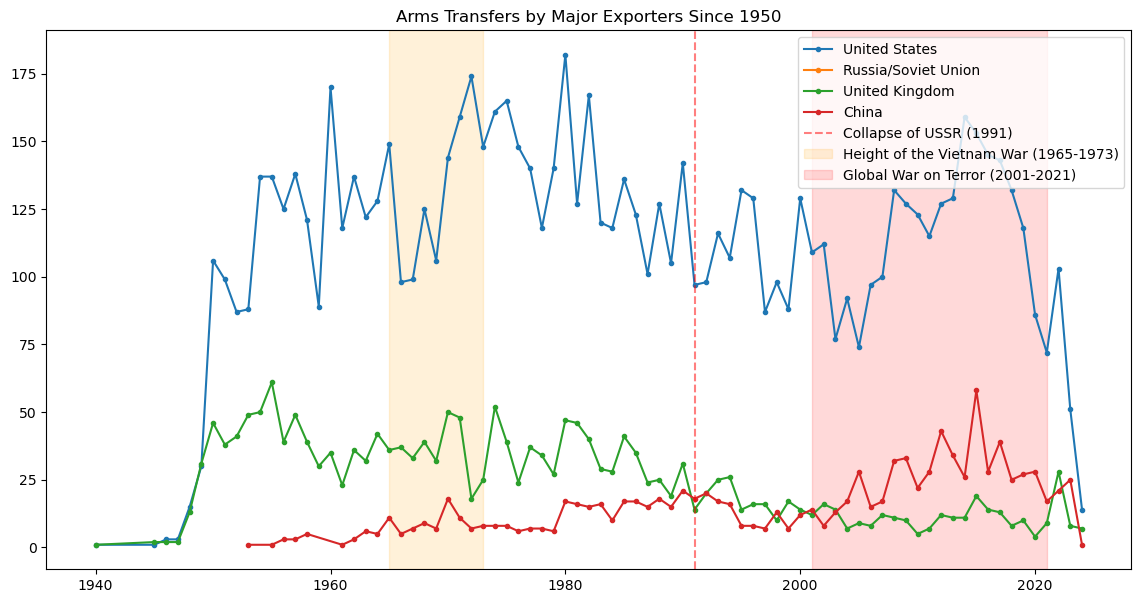

In [41]:
# Weapons By Period 

data2 = data.copy() 

data2['SupplierOverTime'] = data2['Supplier'].replace({'Soviet Union': 'Russia/Soviet Union', 
                                                        'Russia': 'Russia/Soviet Union'})

export_countries = ['United States', 'Russia/Soviet Union', 'United Kingdom', 'China']

data3 = (data2[data2['SupplierOverTime'].isin(export_countries)]
                   .groupby(['Year of order', 'SupplierOverTime'])
                   .size()
                   .reset_index(name='Count'))

plt.figure(figsize = (14, 7)) 

for exporter in export_countries:
    exporterInfo = data3[data3['SupplierOverTime'] == exporter]
    plt.plot(exporterInfo['Year of order'], exporterInfo['Count'], 
             marker = 'o', markersize = 3, label = exporter)
    
plt.axvline(x = 1991, color = 'red', linestyle = '--', alpha = 0.5, label = 'Collapse of USSR (1991)')
plt.axvspan(1965, 1973, color = 'orange', alpha = 0.15, label = 'Height of the Vietnam War (1965-1973)')
plt.axvspan(2001, 2021, color = 'red', alpha = 0.15, label = 'Global War on Terror (2001-2021)')

plt.title('Arms Transfers by Major Exporters Since 1950')
plt.legend(fontsize=10)
plt.show()

Geopolitical tensions from the Cold War fueled the subsequent rise in major weapons transfers, especially in the 1960s and 1970s, from the Vietnam War, and correspondingly fell off with the fall of the Berlin Wall and the disintegration of the Soviet Union into the countries we know today. Also, the group highlighted notable increases as a result of the 9/11 attacks in New York City and the ensuing War on Terror.

# do not include? 


Perhaps the most important assumption our group is taking is that historical delivery patterns (1950–latest year) are informative about near-term (4-year) futures. We can use past arms-transfer data to forecast the next few years if no exogenous geopolitical shocks occur (war, sanctions, regime change, major diplomatic realignments) that would drastically change who buys or sells weapons.

As a result, we look to answer the following question: 

How does the United States going to war with other countries affect imports of countries at war before, during, and after conflict? Specifically, we will be looking information related to the time of the Vietnam War in the 1970s, and making projects on the War on Terror in Afghanistan in the 2000s, and finally comparing the model results with the actual arms transfers. 